In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functions import scrub_data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv', sep=';')

In [3]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
df = scrub_data(df)

In [5]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RDEP,RHOB,GR,...,FM_Tau Fm.,FM_Tor Fm.,FM_Tryggvason Fm.,FM_Tuxen Fm.,FM_Ty Fm.,FM_Ty Mb.,FM_Ula Fm.,FM_Unknown,FM_Utsira Fm.,FM_Vaale Fm.
0,15/9-13,494.528,437631.1875,6470978.5,-469.501831,19.480835,1.611410,1.798681,1.884186,80.200851,...,0,0,0,0,0,0,0,1,0,0
1,15/9-13,494.680,437631.1875,6470978.5,-469.653809,19.468800,1.618070,1.795641,1.889794,79.262886,...,0,0,0,0,0,0,0,1,0,0
2,15/9-13,494.832,437631.1875,6470978.5,-469.805786,19.468800,1.626459,1.800733,1.896523,74.821999,...,0,0,0,0,0,0,0,1,0,0
3,15/9-13,494.984,437631.1875,6470978.5,-469.957794,19.459282,1.621594,1.801517,1.891913,72.878922,...,0,0,0,0,0,0,0,1,0,0
4,15/9-13,495.136,437631.1875,6470978.5,-470.109772,19.453100,1.602679,1.795299,1.880034,71.729141,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP',
       'RHOB', 'GR', 'DTC', 'DRHO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'GRP_BAAT GP.',
       'GRP_BOKNFJORD GP.', 'GRP_CROMER KNOLL GP.', 'GRP_DUNLIN GP.',
       'GRP_HEGRE GP.', 'GRP_HORDALAND GP.', 'GRP_NORDLAND GP.',
       'GRP_ROGALAND GP.', 'GRP_ROTLIEGENDES GP.', 'GRP_SHETLAND GP.',
       'GRP_TYNE GP.', 'GRP_Unknown', 'GRP_VESTLAND GP.', 'GRP_VIKING GP.',
       'GRP_ZECHSTEIN GP.', 'FM_Aasgard Fm.', 'FM_Agat Fm.', 'FM_Amundsen Fm.',
       'FM_BASEMENT', 'FM_Balder Fm.', 'FM_Blodoeks Fm.', 'FM_Broom Fm.',
       'FM_Bryne Fm.', 'FM_Burton Fm.', 'FM_Cook Fm.', 'FM_Drake Fm.',
       'FM_Draupne Fm.', 'FM_Egersund Fm.', 'FM_Eiriksson Mb.',
       'FM_Ekofisk Fm.', 'FM_Etive Fm.', 'FM_Farsund Fm.', 'FM_Fensfjord Fm.',
       'FM_Flekkefjord Fm.', 'FM_Frigg Fm.', 'FM_Grid Fm.', 'FM_Grid Mb.',
       'FM_Hardraade Fm.', 'FM_Heather Fm.', 'FM_Heimdal Fm.', 'F

In [8]:
X = df.drop(['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
             'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1)

In [10]:
y = df.FORCE_2020_LITHOFACIES_LITHOLOGY

In [13]:
y.value_counts()

65000    720803
30000    168937
65030    150455
70000     56320
80000     33329
99000     15245
70032     10513
88000      8213
90000      3820
74000      1688
86000      1085
93000       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [14]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [15]:
y = y.map(lithology_numbers)

In [16]:
y

0          2
1          2
2          2
3          2
4          2
          ..
1170506    0
1170507    1
1170508    1
1170509    1
1170510    1
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1170511, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [45]:
A = np.load('penalty_matrix.npy')

In [46]:
A

array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  

In [47]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

In [48]:
score(y_test.values, np.ones(y_test.shape)*2)

-1.1524157804447968

In [49]:
score(y_test.values, y_test.values)

0.0

In [50]:
clf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

In [51]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
y_pred_test = clf.predict(X_test)

In [53]:
score(y_test.values, y_pred_test)

-0.1158437504271635

In [54]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 1080x1080 with 0 Axes>

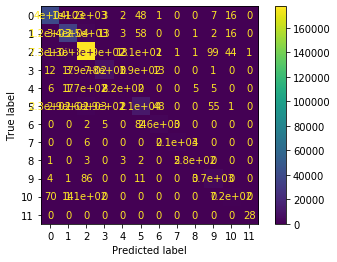

In [55]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(clf, X_test, y_test);